In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Here we have to predict the charges of insurance,therefore it is regression problem.

# non graphical analysis

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Here we see the first 5 rows of dataset

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


- Here we see the last 5 rows of dataset

In [6]:
df.sample(n=3)

,age,sex,bmi,children,smoker,region,charges
1093,22,female,30.400,0,yes,northwest,33907.54800
1198,40,male,29.355,1,no,northwest,6393.60345
1312,34,male,42.900,1,no,southwest,4536.25900


- We check the three random sample from dataset

In [7]:
df.shape

(1338, 7)

- In above dataset it contains 1338 number of rows and 7 number of columns including 6 feature column and 1 target column.

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
missing_value_count = df.isnull().sum()
print('Total Missing Value')
print('\n--------------------------------------')
print(missing_value_count.to_frame('no. of missing value'))

Total Missing Value

--------------------------------------
          no. of missing value
age                          0
sex                          0
bmi                          0
children                     0
smoker                       0
region                       0
charges                      0


- In above dataset there is no null value presents.

In [10]:
distict_value = df.nunique()
print('Total unique Value')
print('\n--------------------------------------')
print(distict_value.to_frame('no. of unique value'))

Total unique Value

--------------------------------------
          no. of unique value
age                        47
sex                         2
bmi                       548
children                    6
smoker                      2
region                      4
charges                  1337


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- In above dataset there are 2 float64, 2 int64 and 3 object data types present.

In [12]:
duplicate_value =df.duplicated().sum()
print(' Total Duplicate Value')
print('\n----------------')
print(duplicate_value)

 Total Duplicate Value

----------------
1


- We found 1 duplicate value in above dataset.therefore we drop the value.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
duplicate_value =df.duplicated().sum()
print(' Total Duplicate Value')
print('\n----------------')
print(duplicate_value)

 Total Duplicate Value

----------------
0


- Now there is no duplicate values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [16]:
numerical_col = []
for i in df.columns:
    if df[i].dtype != 'object':
        numerical_col.append(i)
print(numerical_col)        

['age', 'bmi', 'children', 'charges']


In [17]:
cate_col = []
for j in df.columns:
    if df[j].dtypes == 'object':
        cate_col.append(j)
print(cate_col)        

['sex', 'smoker', 'region']


In [18]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


From above Observation,

- In statistical summary there is no negetive value and count are same so dataset is correct.

- Mean value is slightly greater than from Median value with age, bmi columns which means data is slightly right skewed.

- Between third quartile and max values have much difference with age and bmi columns.

- We observe also the value of 25%, standard deviation.

# graphical analysis

male      675
female    662
Name: sex, dtype: int64

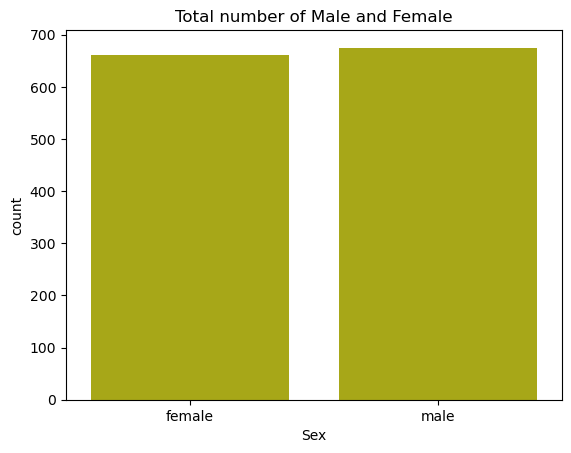

In [19]:
sns.countplot(x='sex', data=df, color='y')
plt.title('Total number of Male and Female')
plt.xlabel('Sex')
df.sex.value_counts()

Based on the count plot and the value counts,

- there are 675 males and 662 females in our dataset.

- this dataset has nearly equal distribution of male and female,with a slight difference of male and does not have a significant gender imbalance.

no     1063
yes     274
Name: smoker, dtype: int64

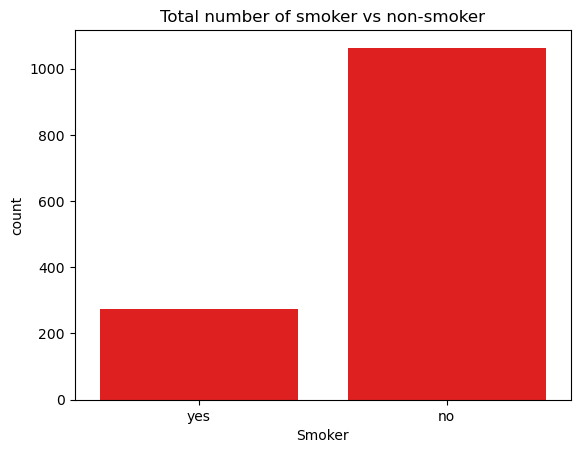

In [20]:
sns.countplot(x='smoker', data=df, color='r')
plt.title('Total number of smoker vs non-smoker')
plt.xlabel('Smoker')
df.smoker.value_counts()

Based on the count plot and the value counts,

- In there 274 individuals are smoker and 1063 individuals are non-smoker in out dataset.

- The plot shows the majority of the people are non-smokers in our dataset.

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

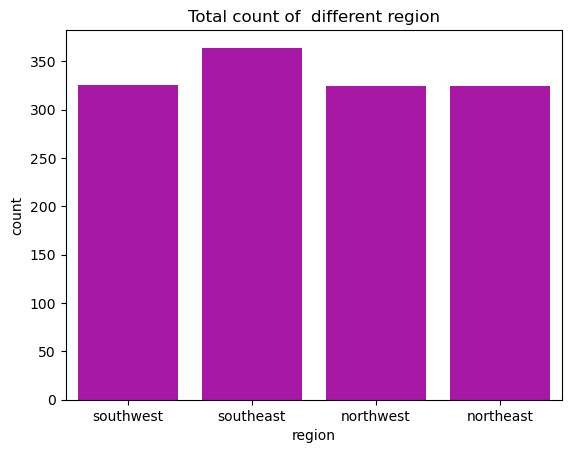

In [21]:
sns.countplot(x = 'region', data=df, color='m')
plt.title('Total count of  different region')
df.region.value_counts()

By the countplot, 

- South-East regions has hihger count with 364.which means majority of people are live in southeast area in US.

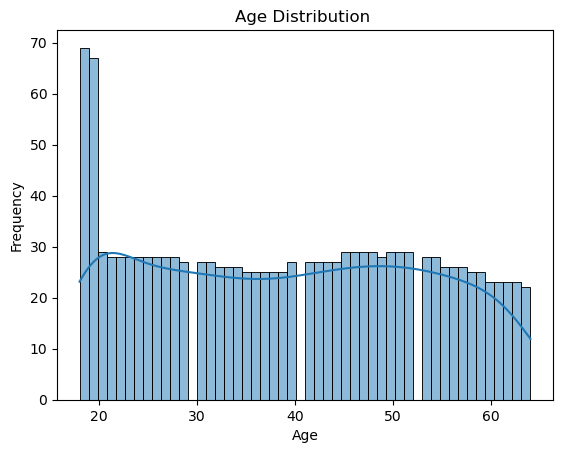

In [22]:
sns.histplot(x='age', data=df, kde=True, bins=50)
plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- By the distribution, we observe that the younger age people between age of 20 is more common age in our dataset.

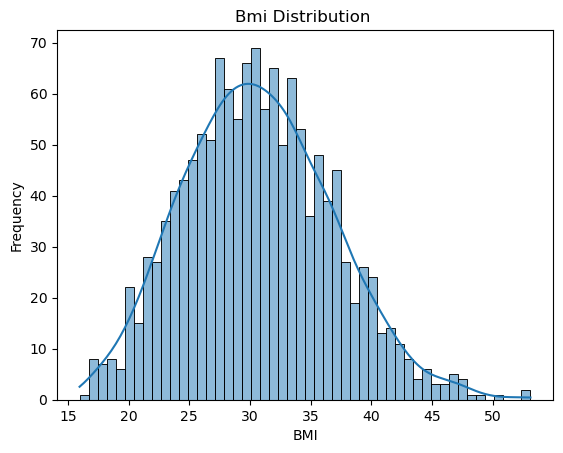

In [23]:
sns.histplot(x='bmi', data=df, kde=True, bins=50)
plt.title('Bmi Distribution ')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

- By the plot, we observe that the data is almost symmetric distributed and slight right skewed which means most of people have bmi range from 20-40 and fewer people have high bmi range.

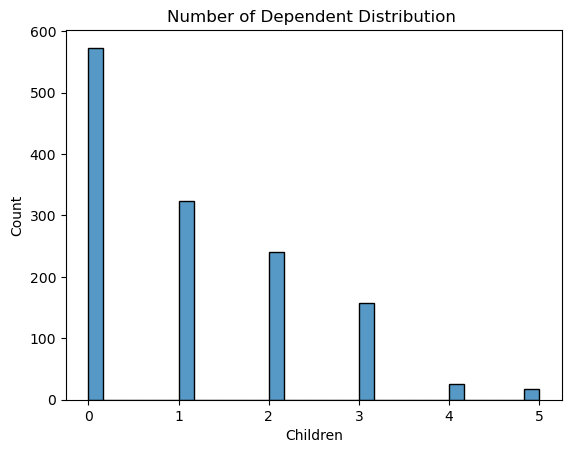

In [24]:
sns.histplot(x='children', data=df, bins=30)
plt.title('Number of Dependent Distribution ')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

- By the plot we observe that,individuals with no children have  more beneficiaries by health insurance.

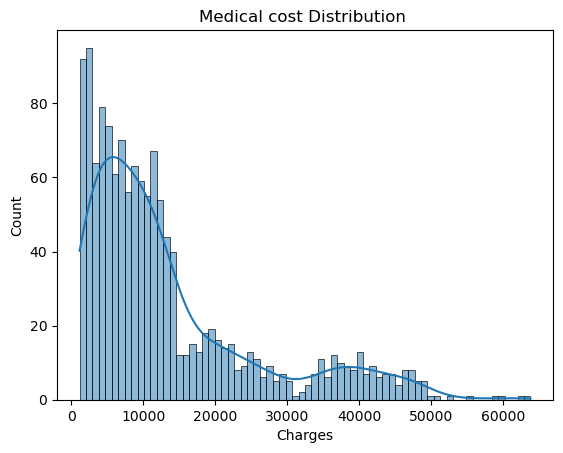

In [25]:
sns.histplot(x='charges', data=df, kde=True, bins=70)
plt.title('Medical cost Distribution ')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

By observe the plot,

- a right-skewed distribution with a peak around a lower charge value and a long tail extending towards higher charges which means that most peoples have lower medical cost and small number of peoples have higher cost.

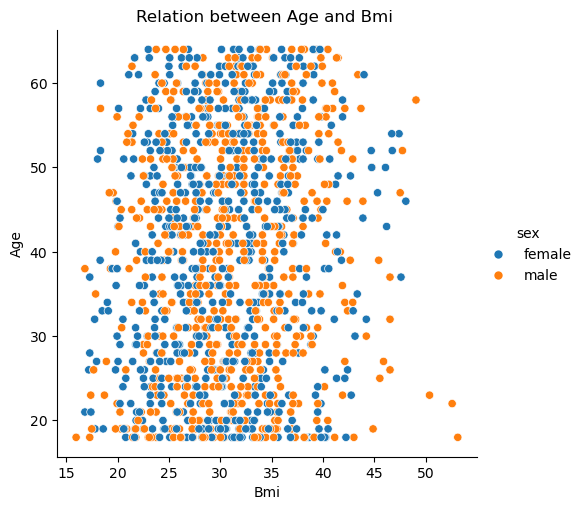

In [26]:
sns.relplot(x='bmi',y='age', data=df, hue='sex')
plt.title('Relation between Age and Bmi ')
plt.xlabel('Bmi')
plt.ylabel('Age')
plt.show()

- By observe the plot,It forms a cluster and we see almost equal gender is distributed and most have a Age range between 20-40

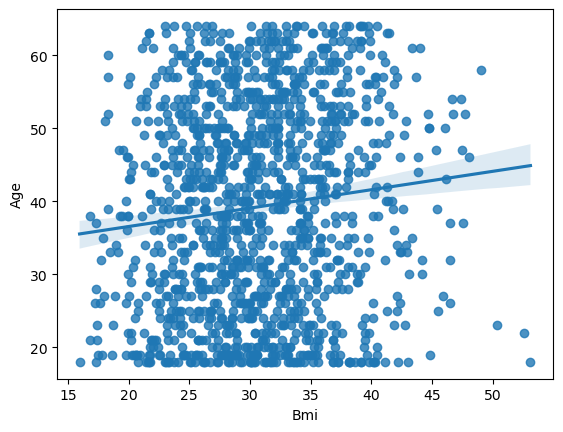

In [27]:
sns.regplot(x='bmi',y='age', data=df)
plt.xlabel('Bmi')
plt.ylabel('Age')
plt.show()

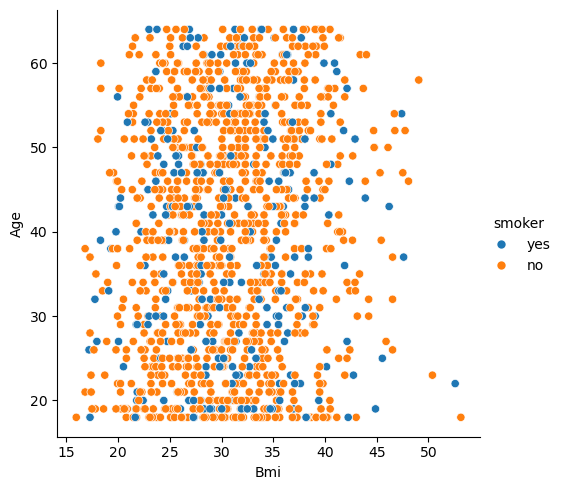

In [28]:
sns.relplot(x='bmi',y='age', data=df, hue='smoker')
plt.xlabel('Bmi')
plt.ylabel('Age')
plt.show()

- By observe the plot,It forms a cluster and  we see most of the indivuals are not a smoker person and  most have a BMI range between 20-40

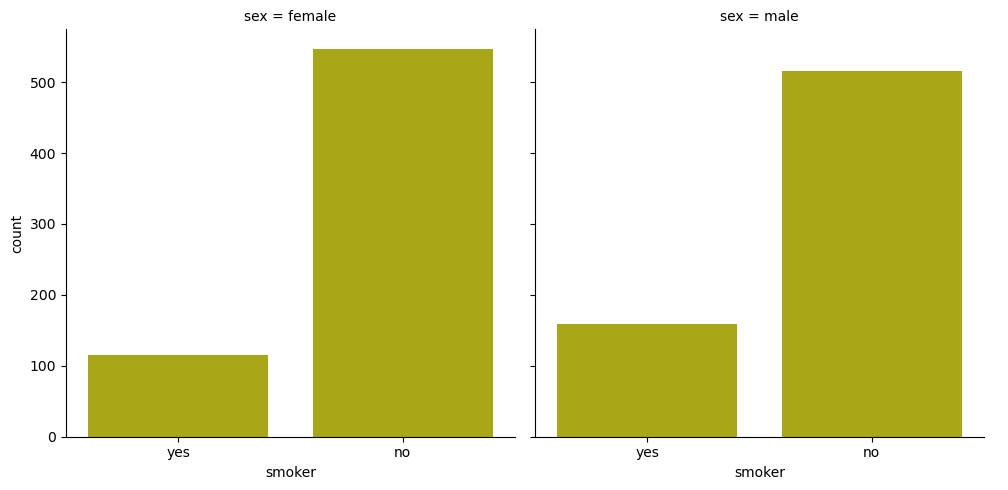

In [29]:
sns.catplot(x='smoker', col='sex', kind='count', data=df, color='y')

By the plot,

- we observe that the higher proportion of male who are smoking as compared to female in out dataset.

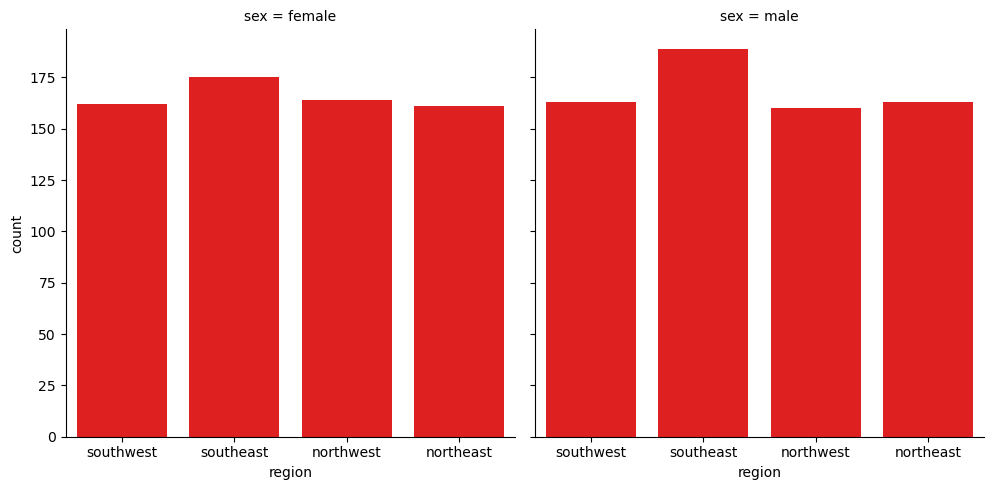

In [30]:
sns.catplot(x='region', col='sex', kind='count', data=df, color='r')

- By observe the plot,more males are based on southeast region as compared to female of southeast region.And other region for both sex are almost equal.

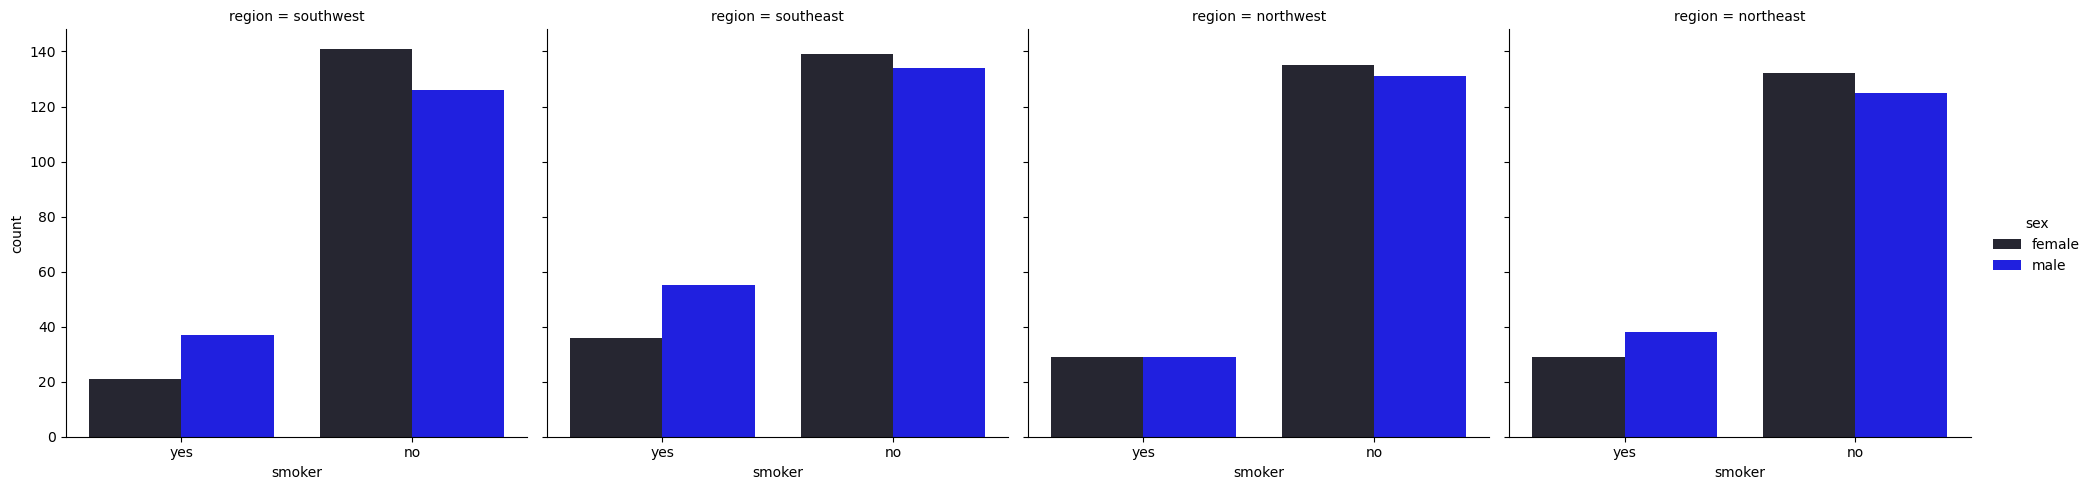

In [31]:
sns.catplot(x='smoker', col='region', kind='count', data=df, color='b', hue='sex')

- By observe at the plot, more number of male person from the southeast region are smoker as compared to female and people from other regions.

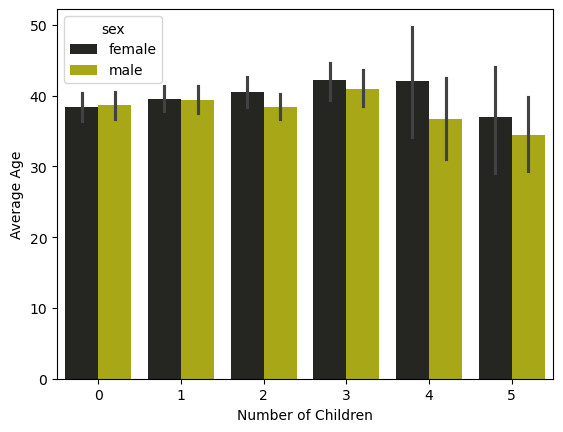

In [32]:
sns.barplot(x='children', y='age', data=df, hue='sex', color='y')
plt.xlabel('Number of Children')
plt.ylabel('Average Age')
plt.show()

- By observe at the plot,it indicates the people have 3 female childs on average tend to be older aged.

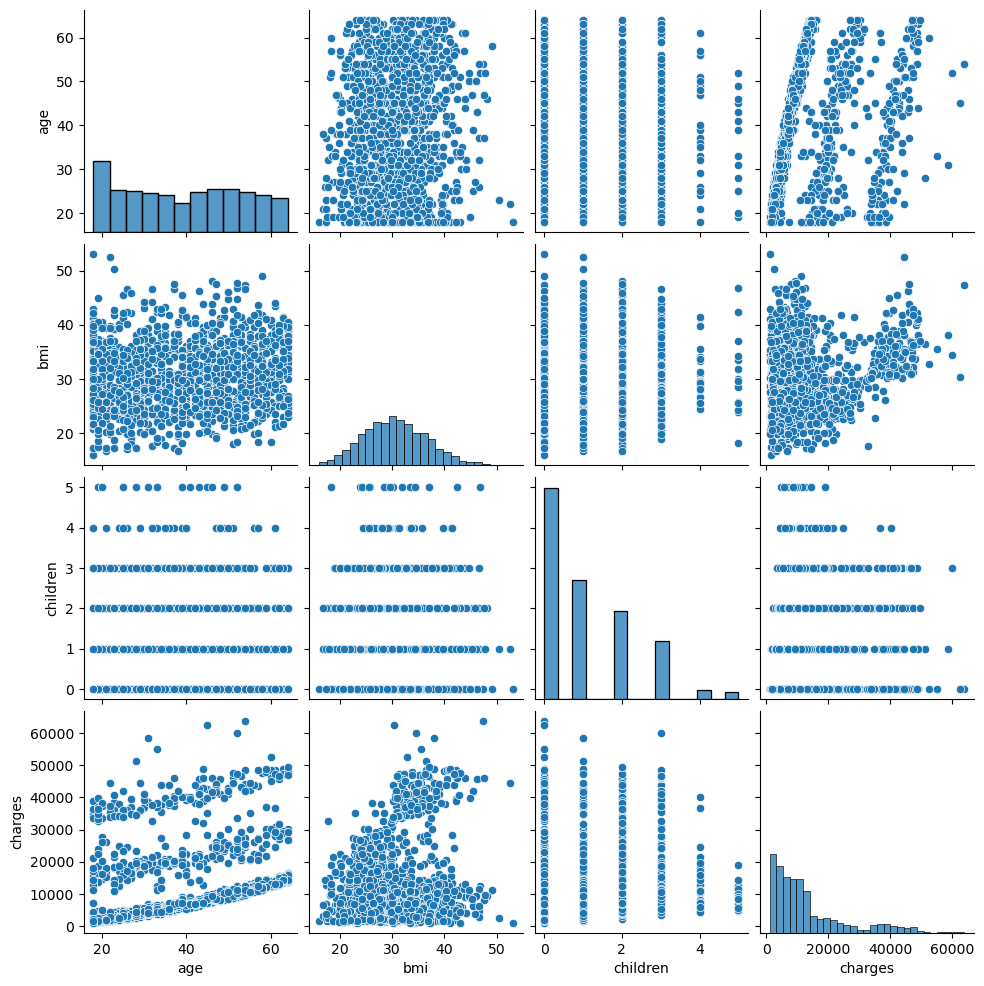

In [33]:
sns.pairplot(df, palette='muted')

# check outlier

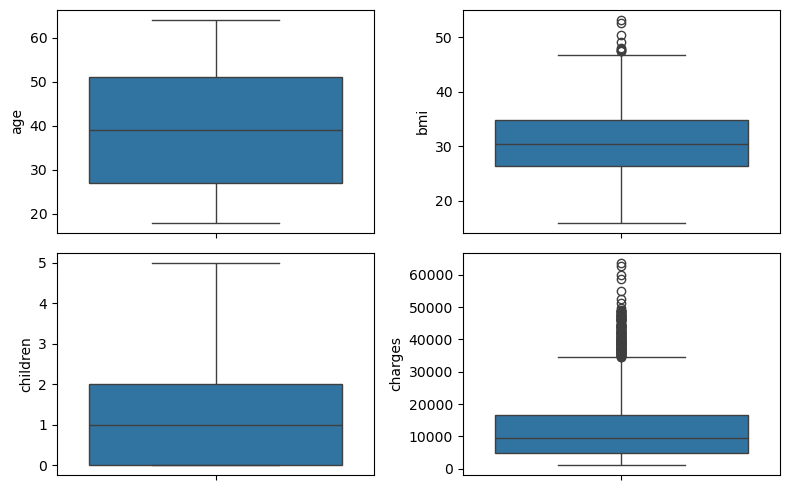

In [34]:
plt.figure(figsize=(8,5))
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col])
    plotnumber+=1
plt.tight_layout()    

# To apply Encoding technique for categorical columns

In [35]:
encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))
df.head()    

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Apply zscore to remove outliers

In [36]:
from scipy.stats import zscore
f = df[['bmi','age']]
z_score = np.abs(zscore(f))

p =(z_score < 2.8).all(axis=1)
df1= df[p]
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,39.234410,0.503381,30.575563,1.096920,0.205109,1.515402,13279.879301
std,14.033924,0.500176,5.970042,1.207277,0.403933,1.106520,12098.245602
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4746.698450
50%,39.000000,1.000000,30.305000,1.000000,0.000000,2.000000,9377.904700
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16717.010750
max,64.000000,1.000000,47.600000,5.000000,1.000000,3.000000,63770.428010


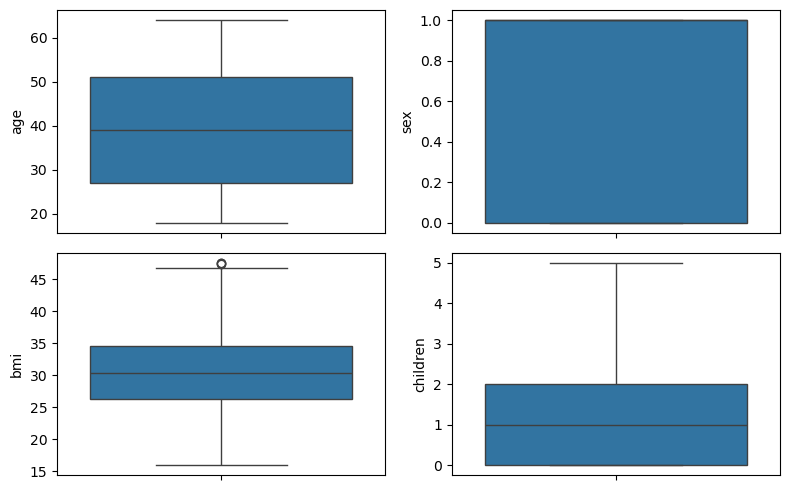

In [37]:
plt.figure(figsize=(8,5))
plotnumber = 1
for col in df1:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df1[col])
    plotnumber+=1
plt.tight_layout() 

In [38]:
print('Old Dtaframe size : ',df.shape[0])
print('New Dtaframe size : ',df1.shape[0])

Old Dtaframe size :  1337
New Dtaframe size :  1331


In [39]:
print('Data Loss Percentage : ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage :  0.44876589379207177


# check skewness

In [40]:
df1.skew()

age         0.055225
sex        -0.013539
bmi         0.185704
children    0.935538
smoker      1.462296
region     -0.035640
charges     1.515028
dtype: float64

There is no skewness present in our dataset.we see that children and smoker column has skewness but it can ignore because of discreate value. 

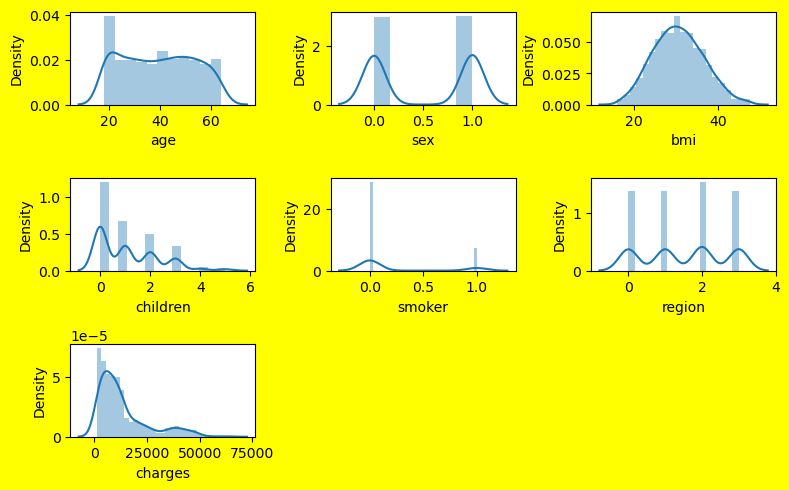

In [41]:
plt.figure(figsize=(8,5),facecolor='yellow')
plotnumber=1

for col in df1:
    if plotnumber <= 8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[col])
    plotnumber+=1
plt.tight_layout()    

# Check correlation

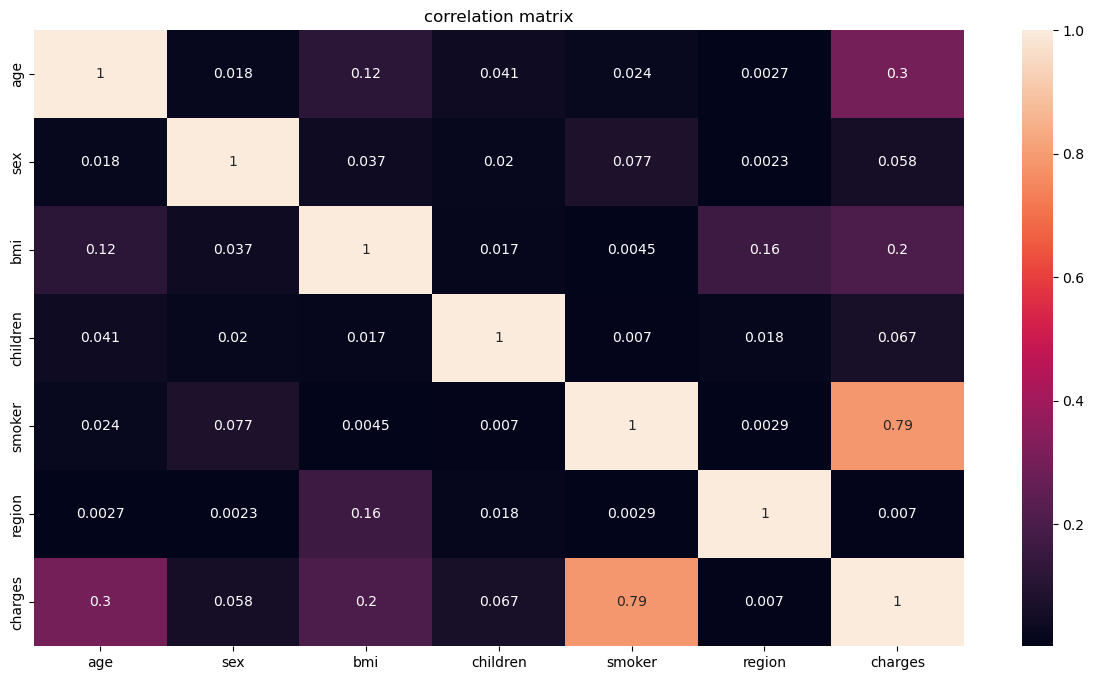

In [42]:
df_corr = df1.corr().abs()
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.title('correlation matrix')
plt.show()

By the plot we observe that smoker and the target column has high correlation.Therefore this smoker column is important for charges column.

# Separating the features and target variables¶

In [43]:
X = df1.drop('charges', axis=1)
y = df1['charges']

# Feature Scaling using StandardScaler to scale the data

In [44]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.377370,0.0,1.0,1.000000
1,0.000000,1.0,0.562895,0.2,0.0,0.666667
2,0.217391,1.0,0.538559,0.6,0.0,0.666667
3,0.326087,1.0,0.213180,0.0,0.0,0.333333
4,0.304348,1.0,0.408344,0.0,0.0,0.333333
...,...,...,...,...,...,...
1326,0.695652,1.0,0.474399,0.6,0.0,0.333333
1327,0.000000,0.0,0.504425,0.0,0.0,0.000000
1328,0.000000,0.0,0.660240,0.0,0.0,0.666667
1329,0.065217,0.0,0.310999,0.0,0.0,1.000000


We have scales the data using MinMax Scaler method to avoid the biasness.

# Checking Variance Inflation Factor(VIF)

In [45]:
f = x.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,age,2.881667
1,sex,1.885776
2,bmi,4.579927
3,children,1.731606
4,smoker,1.242858
5,region,2.688133


In vif all values are less than threshould value(5)therefore there are no multicolinearity present in our dataset 

# Model Building

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [47]:
def metric(reg, x_train, y_train, actual, pred):
    train_aacu = r2_score(reg.predict(x_train),y_train)*100
    test_accu = r2_score(actual,pred)*100
    mse = mean_squared_error(actual,pred)
    mae = mean_absolute_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    return train_aacu,test_accu,mse,mae,rmse

In [48]:
def evaluate_cross_val(model, x, y, actual, pred):
    k = KFold(n_splits=5)
    score = cross_val_score(model, x, y, cv=k)
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------")
    difference = r2_score(actual, pred) - score.mean() 
    return difference

In [49]:
# LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)

In [50]:
train_accu, test_accu, mse, mae, rmse = metric(LR, x_train, y_train, y_test, LR_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 66.14778317246162

------------------------------------------
Test Accuracy Score: 76.01071847421197

------------------------------------------
Mean Squared Error :  36381742.2241848
Mean Absolute Error :  4166.515089682083
Root Mean Squared Error :  6031.727963377062


In [51]:
# LinearRegression
evaluate_cross_val(LR, x, y, y_test, LR_pred)

Cross Validation Score : [0.76247048 0.70982859 0.77444522 0.72983088 0.75996315]
Average Cross Validation Score : 0.7473076624736373

------------------


0.012799522268482355

In [52]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred = GBR.predict(x_test)

In [53]:
train_accu, test_accu, mse, mae, rmse = metric(GBR, x_train, y_train, y_test, GBR_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 89.13302737715281

------------------------------------------
Test Accuracy Score: 86.0273762771282

------------------------------------------
Mean Squared Error :  21190646.911812946
Mean Absolute Error :  2453.3394001843735
Root Mean Squared Error :  4603.329980765331


In [54]:
# GradientBoostingRegressor
evaluate_cross_val(GBR, x, y, y_test, GBR_pred)

Cross Validation Score : [0.87363525 0.79701245 0.88851913 0.848898   0.86180937]
Average Cross Validation Score : 0.8539748380639652

------------------


0.006298924707316744

In [55]:
# ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred = ETR.predict(x_test)

In [56]:
train_accu, test_accu, mse, mae, rmse = metric(ETR, x_train, y_train, y_test, ETR_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 99.87271551830416

------------------------------------------
Test Accuracy Score: 82.60855878045219

------------------------------------------
Mean Squared Error :  26375568.216850385
Mean Absolute Error :  2551.166310374174
Root Mean Squared Error :  5135.714966472573


In [57]:
# ExtraTreesRegressor
evaluate_cross_val(ETR, x, y, y_test, ETR_pred)

Cross Validation Score : [0.83562738 0.74219508 0.84854727 0.80954898 0.84702436]
Average Cross Validation Score : 0.8165886120785768

------------------


0.0094969757259451

In [58]:
# RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred = RFR.predict(x_test)

In [59]:
train_accu, test_accu, mse, mae, rmse = metric(RFR, x_train, y_train, y_test, RFR_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 97.3754225028522

------------------------------------------
Test Accuracy Score: 84.17477432540292

------------------------------------------
Mean Squared Error :  24000271.97620829
Mean Absolute Error :  2602.2433504162454
Root Mean Squared Error :  4899.007243943234


In [60]:
# RandomForestRegressor
evaluate_cross_val(RFR, x, y, y_test, RFR_pred)

Cross Validation Score : [0.85320832 0.77668044 0.86808502 0.8209345  0.85251234]
Average Cross Validation Score : 0.8342841235901665

------------------


0.007463619663862775

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
# AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
ABR_pred = ABR.predict(x_test)

In [77]:
train_accu, test_accu, mse, mae, rmse = metric(ABR, x_train, y_train, y_test, ABR_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu)
print('\n------------------------------------------')
print('Mean Squared Error : ', mse)
print('Mean Absolute Error : ', mae)
print('Root Mean Squared Error : ', rmse)


------------------------------------------
Training Accuracy Score: 81.16154461637069

------------------------------------------
Test Accuracy Score: 83.03193102751925

------------------------------------------
Mean Squared Error :  25733488.96403451
Mean Absolute Error :  3822.9633464231965
Root Mean Squared Error :  5072.818640956378


In [78]:
evaluate_cross_val(ABR, x, y, y_test, ABR_pred)

Cross Validation Score : [0.79993008 0.75588481 0.84596439 0.81039074 0.84426968]
Average Cross Validation Score : 0.8112879415973799

------------------


0.01903136867781252

# From the difference of both R2 score and cross validation score we can conclude that "GradientBoosting Regressor" is our best fit and best performing model

# Tuning the best model

In [79]:
parameters = {
    'n_estimators' : [50,100,150],
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['squared_error', 'friedman_mse'],
    'min_samples_split' : [2.5,5,2],
    'min_samples_leaf': [1,5,3],
    'max_features' : ['sqrt','log2']
}

In [80]:
gcv = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [81]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 3],
                         'min_samples_split': [2.5, 5, 2],
                         'n_estimators': [50, 100, 150]})

In [82]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 150}

In [83]:
gb = GradientBoostingRegressor(criterion = 'friedman_mse', loss = 'huber', max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 5, n_estimators = 150)
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
print('\n------------------------------------------')
print('Training Accuracy : {}'.format(r2_score(gb.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,gb_pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,gb_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,gb_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,gb_pred)))


------------------------------------------
Training Accuracy : 85.28810567581185

--------------------------------------------
Testing Accuracy : 85.82641961509955


Mean Squared Error :  21495414.41676299
Mean Absolute Error :  1752.1715840076172
Root Mean Squared Error :  4636.3147452220055


In [84]:
gcv.best_score_

0.8529244784239648

# Save model

In [86]:
import joblib

joblib.dump(gb, 'Medical_Insurance_Predictions.pkl')

['Medical_Insurance_Predictions.pkl']

In [87]:
# load model
Load = joblib.load('Medical_Insurance_Predictions.pkl')

In [88]:
pred = Load.predict(x_test)

actual = np.array(y_test)

In [89]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : pred
})

,Actual,Prediction
0,11534.87265,10272.631100
1,9991.03765,9847.562168
2,3238.43570,3940.805173
3,9249.49520,9527.715236
4,4058.71245,4348.823939
...,...,...
328,14455.64405,15713.268016
329,13470.86000,13664.515177
330,8605.36150,8131.738459
331,29330.98315,28479.685015
